# Reproduction of Toy Experiment
 - getting used to jupyter notebooks
 - refreshing knowledge about python
 - starting with TF!

In [1]:
import tensorflow as tf
tf.set_random_seed(1234)
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
import matplotlib

/home/risto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/risto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/risto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/risto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

# Global Variables

In [2]:
def normal_distribution(mean, cov, n):
    return np.random.multivariate_normal(mean, cov, n)

mean = [[- 0.5, 0.5], [0.5, -0.5]]           # [Signal, Background]
cov = [[[1, 0], [0, 1]], [[1, 0], [0, 1]]]  # [Signal, Background]
n = [10000, 10000]                          # [Signal, Background]

bins_for_plots = [0.0, 0.5, 1.0]
bins_for_plots_middle = []
# in this case the middle of bins is [0.25, 0.75]
for i in range(0, len(bins_for_plots) - 1):
    bins_for_plots_middle.append(bins_for_plots[i] + (bins_for_plots[i + 1] - bins_for_plots[i]) / 2)

border = bins_for_plots[1]

picture_index = "differentmean3"

## Create a 2D dataset that follows the normal derivation for signal and background

In [3]:
# multivariate_normal gives 2 separate lists with events-coordinates following the normal distribution
# here the two lists represent x- and y-direction
signal_raw = normal_distribution(mean[0], cov[0], n[0])
background_raw = normal_distribution(mean[1], cov[1], n[1])

signal = signal_raw.T
background = background_raw.T

## Reduce dimensionality of dataset with histograms

In [4]:
number_of_bins = 10
scale = 3   # bin width = scale / number of bins
bins = np.linspace(-scale, scale, number_of_bins)

signal_data_x = signal[1]
signal_data_y = signal[0]
background_data_x = background[1]
background_data_y = background[0]

hist_signal = np.histogram2d(signal_data_x, signal_data_y, bins= [bins,bins])
hist_background = np.histogram2d(background_data_x, background_data_y, bins= [bins, bins])


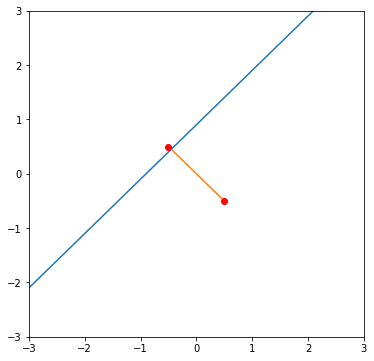

1.0 [-0.45, 0.45]


In [5]:
# draw max likelihood decision boundry for two identical signals dnamically

vec = []
for i in range(0, len(mean[0])):
    vec.append(mean[1][i] - mean[0][i])
perpendicular_vec = [-1 * vec[1], vec[0]]
magnitude = perpendicular_vec[0] / perpendicular_vec[1]
bias = [mean[0][0] + (vec[0] / 2) * (n[0] / n[1]), mean[0][1] + (vec[1] / 2) * (n[0] / n[1])]

def linear_function(x, magnitude, bias):
    return magnitude * (x - bias[1]) + bias[0]

graph_limit = [-10, 10]
lin_func = linear_function(np.linspace(graph_limit[0],graph_limit[1],200), magnitude, bias)

plt.figure(figsize=(6,6))
plt.plot([lin_func[0], lin_func[-1]], [graph_limit[0], graph_limit[1]])
plt.plot([mean[0][0], mean[1][0]], [mean[0][1], mean[1][1]])
plt.plot(mean[0][0],mean[0][1],'ro')
plt.plot(mean[1][0], mean[1][1], 'ro')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
#plt.savefig("/home/risto/Masterarbeit/Python/significance_plots/magnitude_bias_plot_{}.png".format(picture_index), bbox_inches = "tight")
plt.show()
print(magnitude, bias)

## Plot both 2D histograms in one figure

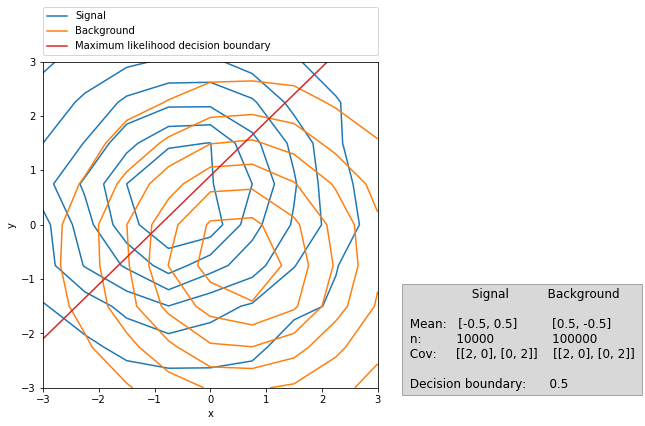

In [6]:
limit = [-3, 3]
plt.figure(figsize=(6, 6))
cmap_sig = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C0"] * 3)
cmap_bkg = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C1"] * 3)
# extent setzt den Mittelpunkt des Signals/Backgrounds auf dessen Ursprung
plt.contour(hist_signal[0], extent= [hist_signal[1][0], hist_signal[1][-1], hist_signal[2][0] , hist_signal[2][-1]], cmap= cmap_sig)
plt.contour(hist_background[0], extent= [hist_background[1][0], hist_background[1][-1], hist_background[2][0], hist_background[2][-1]], cmap= cmap_bkg)
plt.plot([-999], [-999], color="C0", label="Signal")
plt.plot([-999], [-999], color="C1", label="Background")
plt.plot([lin_func[0], lin_func[-1]], [graph_limit[0], graph_limit[1]], color="C3", label="Maximum likelihood decision boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(limit[0], limit[1])
plt.ylim(limit[0], limit[1])
plt.text(3.5, -3, "\t \t Signal \t Background \n \n Mean: \t {} \t     {} \n n: \t    {} \t        {} \n Cov: \t  {}    {} \n \n Decision boundary: \t {}".format(mean[0], mean[1], n[0], n[1], cov[0], cov[1], border).expandtabs(), fontsize= 12, bbox=dict(facecolor='grey', alpha=0.3))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
#plt.savefig("/home/risto/Masterarbeit/Python/significance_plots/signal_background_plot_{}.png".format(picture_index), bbox_inches = "tight")
plt.show()

## Plot significance of Maximum Likelihood Method

Signal: [5268, 4732], Background: [17394, 82606]


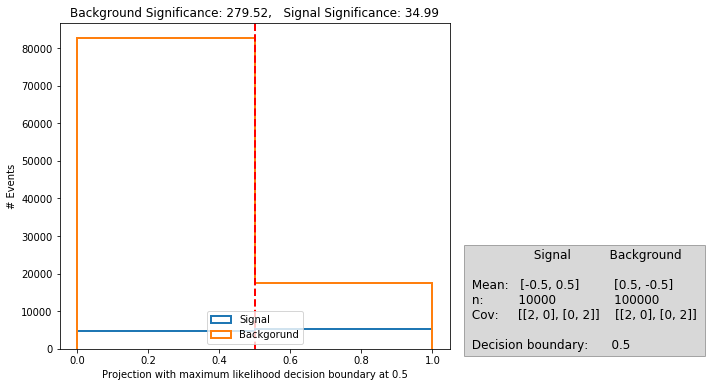

In [7]:
# ACHTUNG: Positionsabhängig, nicht dynamisch programmiert!!
# Betrachte alle Punkte, die auf der Seite des Signals liegen, indem alle Events gezählt werden,
# bei denen der Y-Wert > X-Wert ist -> aus Maximum Likelihood
#magnitude * (x - bias[1]) + bias[0]
def num_sig(x):
    #return [np.sum(x[1] > magnitude * (x[0] - bias[1]) + bias[0]), np.sum(x[1] < magnitude * (x[0] - bias[1]) + bias[0])]
    #return [np.sum(x[1] > x[0]), np.sum(x[1] < x[0])]
    if magnitude == 0:
        return [np.sum((x[0] - bias[0]) < 0), np.sum((x[0] - bias[0]) > 0)]
    else:
        return [np.sum(x[1] > (1 / magnitude) * (x[0] - bias[0]) + bias[1]), np.sum(x[1] < (1 / magnitude) * (x[0] - bias[0]) + bias[1])]
    
s = num_sig(signal)         # Alle Signalevents
b = num_sig(background)     # Alle Bkgevents

print("Signal: {}, Background: {}".format(s, b))

# Einfache Schätzung der Signifikanz für hohe Anzahl von Events 
signal_significance = s[0] / np.sqrt(s[0] + b[0])      # index 0 = signal side
background_significance = b[1] / np.sqrt(s[1] + b[1])  # index 1 = background side

# plotting signal versus background on expected vs unexpected
# everything on signal side of maximum likelihood ist here plotted left to 0
plt.figure(figsize=(7, 6))
plt.hist(bins_for_plots_middle, weights= [s[1], s[0]], bins= bins_for_plots, histtype="step", lw=2, label="Signal")
plt.hist(bins_for_plots_middle, weights= [b[1], b[0]], bins= bins_for_plots, histtype="step", lw=2, label="Backgorund")
plt.legend(loc= "lower center")
#plt.text(0.56, 7000, "Signal side of decision boundary", fontsize= 8)
#plt.text(0.03, 7000, "Background side of decision boundary", fontsize= 8)
plt.title("Background Significance: {:.2f},   Signal Significance: {:.2f}".format(background_significance, signal_significance))
plt.xlabel("Projection with maximum likelihood decision boundary at {}".format(border))
plt.ylabel("# Events")
plt.axvline(x = border, ymin= 0, ymax= max(n[0], n[1]), color="r", linestyle= "dashed", lw=2)
plt.text(1.1, 0, "\t \t Signal \t Background \n \n Mean: \t {} \t     {} \n n: \t    {} \t        {} \n Cov: \t  {}    {} \n \n Decision boundary: \t {}".format(mean[0], mean[1], n[0], n[1], cov[0], cov[1], border).expandtabs(), fontsize= 12, bbox=dict(facecolor='grey', alpha=0.3))
#plt.savefig("/home/risto/Masterarbeit/Python/significance_plots/significance_hist_max_like_{}.png".format(picture_index), bbox_inches = "tight")
plt.show()

# Optimizing significance with NN (quick overview)
- define model of NN
- define binfunction with custom gradient (gauss derivative)
- define histogram representation
- define input variables for model in terms of signal / background
- define significance as loss
- choose sigmoid activation function for NN output
- optimize model regarding significance with adam optimizer

## Define model of NN

In [8]:
# here x are event coordinates
def model(x, num_inputs, reuse=False, scope="model"):
    # tf.variable_scope is a context manager which validates that the (optional) values are from the 
    # same graph, ensures that graph is the default graph, and pushes a name scope and a variable scope
    with tf.variable_scope(scope, reuse=reuse) as scope:
        hidden_nodes = 100 # in hidden layer
        # from input to hidden layer:
        w1 = tf.get_variable('w1', shape=(num_inputs, hidden_nodes), dtype=tf.float32,
                initializer=tf.random_normal_initializer(stddev=0.1)) #random_uniform!
        b1 = tf.get_variable('b1', shape=(hidden_nodes), dtype=tf.float32,
                initializer=tf.constant_initializer(0.1))
        # from hidden to output layer:
        w2 = tf.get_variable('w2', shape=(hidden_nodes, 1), dtype=tf.float32,
                initializer=tf.random_normal_initializer(stddev=0.1))
        b2 = tf.get_variable('b2', shape=(1), dtype=tf.float32,
                initializer=tf.constant_initializer(0.1))
    
    # tf.nn.relu is Rectified Linear Unit activation function - here for first neuron computation
    hidden_layer = tf.nn.relu(tf.add(b1, tf.matmul(x, w1))) # equivalent to sum(w1*x1 + b1) for each hidden node
    # no activation function for output needed, since its defined later in code (sigmoid)
    output_layer = tf.add(b2, tf.matmul(hidden_layer, w2)) # equivalent to sum(w2*x2 + b2) for signle output node
    f = tf.squeeze(output_layer)
    return f

## Define binfunction with custom gradient (gauss derivative)
## Define histogram representation

In [9]:
# custom gradient allows better numerical precision for functions with diverging or not defined derivative
@tf.custom_gradient
# binfunction selects all outputs from NN and distributes the accompanying events into the certain bin
# left and right edge represent the bin borders
def binfunction(x, right_edge, left_edge):
    # tf.cast casts a tensor to a new type -> here float32, just in case
    # tf.squeeze removes dimensions of size 1 from the shape of a tensor
    y = tf.squeeze(tf.cast(tf.cast(x > left_edge, tf.float32) * tf.cast(x <= right_edge, tf.float32), tf.float32))
    # for the derivative, the binfunction is approximated by a normal distribution
    def grad(dy):
        width = right_edge - left_edge
        mid = left_edge + 0.5 * width
        sigma = 0.5 * width
        gauss = tf.exp(-1.0 * (x - mid)**2 / 2.0 / sigma**2)
        g = -1.0 * gauss * (x - mid) / sigma**2
        g = tf.squeeze(g) * tf.squeeze(dy)
        return (g, None, None)
    return y, grad


# function that counts all classified events in each bin
def hist(x, bins):
    counts = []
    # splits histogram in bins regarding their left and right edges
    # zip function puts left and right edge together in one iterable array
    for right_edge, left_edge in zip(bins[1:], bins[:-1]):
        # sums up all 1 entries of each bin 
        counts.append(tf.reduce_sum(binfunction(x, right_edge, left_edge)))
    return tf.squeeze(tf.stack(counts))


## Define input variables for model in terms of signal / background events

In [10]:
# variables have to be defined before start of tf.session()!
# running multiple sessions also possible
x_sig = tf.placeholder(tf.float32, shape=[None, 2]) # x-y-coordinates of signal events
x_bkg = tf.placeholder(tf.float32, shape=[None, 2]) # x-y-coordinates of background events
f_sig = tf.sigmoid(model(x_sig, 2)) # NN output of signal
f_bkg = tf.sigmoid(model(x_bkg, 2, reuse=True)) # NN output of background

hist_sig = hist(f_sig, bins_for_plots) # Signal events represented by histogram 
hist_bkg = hist(f_bkg, bins_for_plots) # Background events represented by histogram 

In [11]:
# initial run of model
sess = tf.Session()
# initiate random values to global variables such as weights and biases
sess.run(tf.global_variables_initializer())

test = sess.run([hist_sig, hist_bkg, f_sig, f_bkg, x_sig, x_bkg], feed_dict={x_sig: signal_raw, x_bkg: background_raw})
# output has form:  test = test[hist_sig, hist_bkg, f_sig, f_bkg, x_sig, x_bkg]


### Quick random sample survey of initial model performance

In [12]:
# before optimization
#print("Hist Signal: {}, Hist Background: {}".format(test[0], test[1]))
#for i in range(0, 10):
#    print("Probe {}".format(1000*i))
#    print("F Signal: {}, F Backgorund: {}".format(test[2][1000*i], test[3][1000*i]))
#    print("X Signal: {}, X Background: {}".format(test[4][1000*i], test[5][1000*i]))
#    print("-------------------------------------------------------------------------")

## Define significance as loss & using Adam Optimizer

In [19]:
s = [hist_sig[0], hist_sig[1]]
b = [hist_bkg[0], hist_bkg[1]]
# flip significance graph with negative sign to search for minimum instead of maximum
loss = -1.0 * (s[1] / tf.sqrt(s[1] + b[1]) + b[0] / tf.sqrt(s[0] + b[0]))
minimize = tf.train.AdamOptimizer().minimize(loss)
sess.run(tf.global_variables_initializer())

# specify training
min_loss = 0
max_patience = 10
patience = max_patience

for epoch in range(300):
    loss_, _, s_ = sess.run([loss, minimize, s], feed_dict={x_sig: normal_distribution(mean[0], cov[0], n[0]), x_bkg: normal_distribution(mean[1], cov[1], n[1])})
    if loss_ > min_loss:
        patience -= 1
    else:
        min_loss = loss_
        patience = max_patience
    
    if epoch % 10 == 0 or patience == 0:
        print("Epoch {} : Loss {}".format(epoch, loss_))
        
    if patience == 0:
        print("Trigger early stopping in epoch {}.".format(epoch))
        break

0 1069.0 8931.0
Epoch 0 : Loss -232.1263885498047
1 1692.0 8308.0
2 2099.0 7901.0
3 2699.0 7301.0
4 3446.0 6554.0
5 3904.0 6096.0
6 4153.0 5847.0
7 4647.0 5353.0
8 4877.0 5123.0
9 5185.0 4815.0
10 5465.0 4535.0
Epoch 10 : Loss -317.6085205078125
11 5649.0 4351.0
12 5867.0 4133.0
13 6098.0 3902.0
14 6246.0 3754.0
15 6469.0 3531.0
16 6705.0 3295.0
17 6824.0 3176.0
18 6986.0 3014.0
19 7175.0 2825.0
20 7260.0 2740.0
Epoch 20 : Loss -325.21478271484375
21 7502.0 2498.0
22 7531.0 2469.0
23 7732.0 2268.0
24 7893.0 2107.0
25 8075.0 1925.0
26 8243.0 1757.0
27 8324.0 1676.0
28 8427.0 1573.0
29 8587.0 1413.0
30 8727.0 1273.0
Epoch 30 : Loss -323.0053405761719
31 8866.0 1134.0
32 8911.0 1089.0
Epoch 32 : Loss -322.7038269042969
Trigger early stopping in epoch 32.


### Quick random sample survey of model performance after optimization

In [ ]:
test = sess.run([hist_sig, hist_bkg, f_sig, f_bkg, x_sig, x_bkg], feed_dict={x_sig: signal_raw, x_bkg: background_raw})

#print("Hist Signal: {}, Hist Background: {}".format(test[0], test[1]))
#for i in range(0, 10):
#    print("Probe {}".format(1000*i))
#    print("F Signal: {}, F Backgorund: {}".format(test[2][1000*i], test[3][1000*i]))
#    print("X Signal: {}, X Background: {}".format(test[4][1000*i], test[5][1000*i]))
#    print("-------------------------------------------------------------------------")

## Plotting results after optimization of significance

Hist Signal [9116.  884.], Hist Background [98891.  1109.]


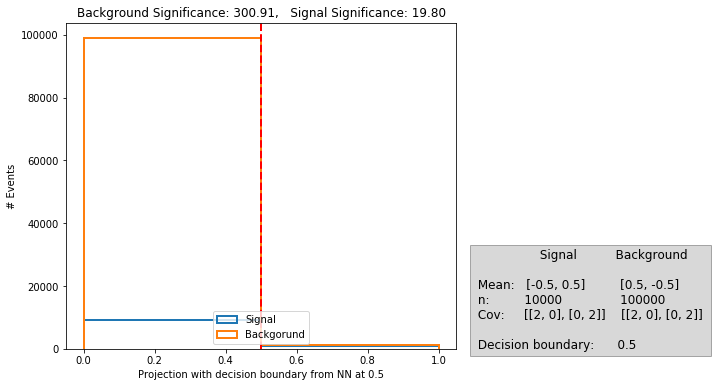

In [20]:
opt_hist_sig, opt_hist_bkg = sess.run([hist_sig, hist_bkg], feed_dict={x_sig: signal_raw, x_bkg: background_raw})

print("Hist Signal {}, Hist Background {}".format(opt_hist_sig, opt_hist_bkg))

# check signal significance on signal side of decision boundary
s = [opt_hist_sig[0], opt_hist_sig[1]]
b = [opt_hist_bkg[0], opt_hist_bkg[1]]
opt_sig_significance = s[1] / np.sqrt(s[1] + b[1])

# check background significance on background side of decision boundary
opt_bkg_significance = b[0] / np.sqrt(s[0] + b[0])

opt_total_significance = opt_sig_significance + opt_bkg_significance

plt.figure(figsize=(7, 6))
plt.hist(bins_for_plots_middle, weights= [s[0], s[1]], bins= bins_for_plots, histtype="step", label="Signal", lw=2)
plt.hist(bins_for_plots_middle, weights= [b[0], b[1]], bins= bins_for_plots, histtype="step", label="Backgorund", lw=2)
plt.legend(loc= "lower center")
#plt.text(0.56, 7000, "Signal side of decision boundary", fontsize= 8)
#plt.text(0.02, 7000, "Background side of decision boundary", fontsize= 8)
plt.title("Background Significance: {:.2f},   Signal Significance: {:.2f}".format(opt_bkg_significance, opt_sig_significance))
plt.xlabel("Projection with decision boundary from NN at {}".format(border))
plt.ylabel("# Events")
plt.axvline(x = border, ymin= 0, ymax= max(n[0], n[1]), color="r", linestyle= "dashed", lw=2)
plt.text(1.1, 0, "\t \t Signal \t Background \n \n Mean: \t {} \t     {} \n n: \t    {} \t        {} \n Cov: \t  {}    {} \n \n Decision boundary: \t {}".format(mean[0], mean[1], n[0], n[1], cov[0], cov[1], border).expandtabs(), fontsize= 12, bbox=dict(facecolor='grey', alpha=0.3))
#plt.savefig("/home/risto/Masterarbeit/Python/significance_plots/significance_hist_NN_{}.png".format(picture_index), bbox_inches = "tight")
plt.show()

In [21]:
length = 2000
sensibility = 0.005
b = np.linspace(-3, 3, length)
xx, yy = np.meshgrid(b, b, sparse=False)
x = np.vstack([xx.reshape((length * length)), yy.reshape((length * length))]).T
c = sess.run(f_sig, feed_dict={x_sig: x})
c = c.reshape((length, length))
# visualize decision boundary
boundary = sess.run(f_sig, feed_dict={x_sig: x})
boundary = boundary.reshape((length, length))

for y in range(0, length):
    for x in range(0, length):
        if c[y][x] > border-sensibility and c[y][x] < border+sensibility:
            boundary[y][x] = 1
        else:
            boundary[y][x] = 0

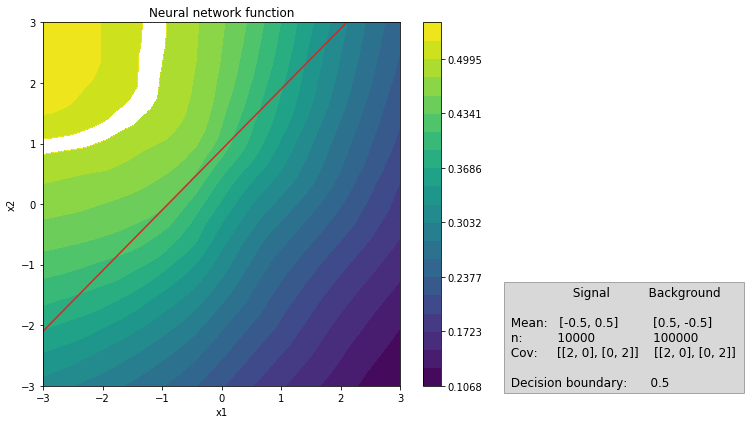

In [22]:
plt.figure(figsize=(7, 6))
cbar = plt.contourf(xx, yy, c + boundary, levels=np.linspace(c.min(), c.max(), 21))
plt.colorbar(cbar)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Neural network function")
plt.text(4.8, -3, "\t \t Signal \t Background \n \n Mean: \t {} \t     {} \n n: \t    {} \t        {} \n Cov: \t  {}    {} \n \n Decision boundary: \t {}".format(mean[0], mean[1], n[0], n[1], cov[0], cov[1], border).expandtabs(), fontsize= 12, bbox=dict(facecolor='grey', alpha=0.3))
plt.tight_layout()
plt.xlim(limit[0], limit[1])
plt.ylim(limit[0], limit[1])
plt.plot([lin_func[0], lin_func[-1]], [graph_limit[0], graph_limit[1]], color="C3", label="Maximum likelihood decision boundary")
#plt.savefig("/home/risto/Masterarbeit/Python/significance_plots/NN_function_{}.png".format(picture_index), bbox_inches = "tight")
plt.show()